In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<h1>Anime Dataset CPA01</h1>
This dataset shows anime and their reccomendation scores based on the website MyAnimeList.net aggregated until the year 2020.

You can find this dataset by going to https://www.kaggle.com/hernan4444/anime-recommendation-database-2020 and clicking the download button on the "anime.csv" file.

The two questions I have are:

    1. What is the top rated anime?
    2. What is the most watched & most dropped anime?

In [2]:
df = pd.read_csv("anime.csv", index_col=4)

**Make the data more readable by making the indeces where the names are unknown and filling them with names that are known, and making the Genres column from a list into one word:**

In [3]:
df.index = np.where(df.index == 'Unknown', df['Name'], df.index)
df["Genres"] = [x.strip('()').split(', ') for x in df['Genres']]
df["Genres"] = [x[0] for x in df["Genres"]]

<h2>Describe the data using .describe():</h2>

In [4]:
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


<h2>Column Names:</h2>

In [5]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'Japanese name', 'Type',
       'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors', 'Studios',
       'Source', 'Duration', 'Rating', 'Ranked', 'Popularity', 'Members',
       'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

<h2>Indeces:</h2>
(there are 17562 indeces, so it is a little cut off)

In [6]:
df.index

Index(['Cowboy Bebop', 'Cowboy Bebop:The Movie', 'Trigun',
       'Witch Hunter Robin', 'Beet the Vandel Buster', 'Eyeshield 21',
       'Honey and Clover', 'Hungry Heart: Wild Striker',
       'Initial D Fourth Stage', 'Monster',
       ...
       'SK∞: Crazy Rock Jam', 'Kyoukai Senki', 'D_Cide Traumerei',
       'Tsuki to Laika to Nosferatu', 'Wan Jie Shen Zhu 3rd Season',
       'Daomu Biji Zhi Qinling Shen Shu', 'Mieruko-chan',
       'Higurashi:When They Cry – SOTSU', 'Yama no Susume: Next Summit',
       'Scarlet Nexus'],
      dtype='object', length=17562)

<h2>Pivot table of data:</h2>

In [7]:
pd.pivot_table(data = df, index = ["Name"])

,Completed,Dropped,Favorites,MAL_ID,Members,On-Hold,Plan to Watch,Popularity,Watching
Name,,,,,,,,,
"""0""",2552.0,37.0,1.0,20707,3108.0,25,458.0,7736.0,36.0
"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",124.0,74.0,8.0,25627,343.0,9,123.0,13082.0,13.0
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",12789.0,104.0,12.0,7669,17659.0,195,4292.0,3876.0,279.0
"""Bungaku Shoujo"" Memoire",15648.0,372.0,36.0,8481,25298.0,578,7819.0,3259.0,881.0
"""Bungaku Shoujo"" Movie",31602.0,642.0,222.0,6408,57895.0,764,23468.0,2049.0,1419.0
...,...,...,...,...,...,...,...,...,...
xxxHOLiC Rou,37721.0,433.0,188.0,6864,57509.0,974,16388.0,2066.0,1993.0
xxxHOLiC Shunmuki,41276.0,373.0,114.0,4918,58927.0,693,15299.0,2026.0,1286.0
Üks Uks,53.0,43.0,0.0,29708,183.0,7,75.0,15229.0,5.0


<h2>Graph of Highest Rated Anime in 2020:</h2>

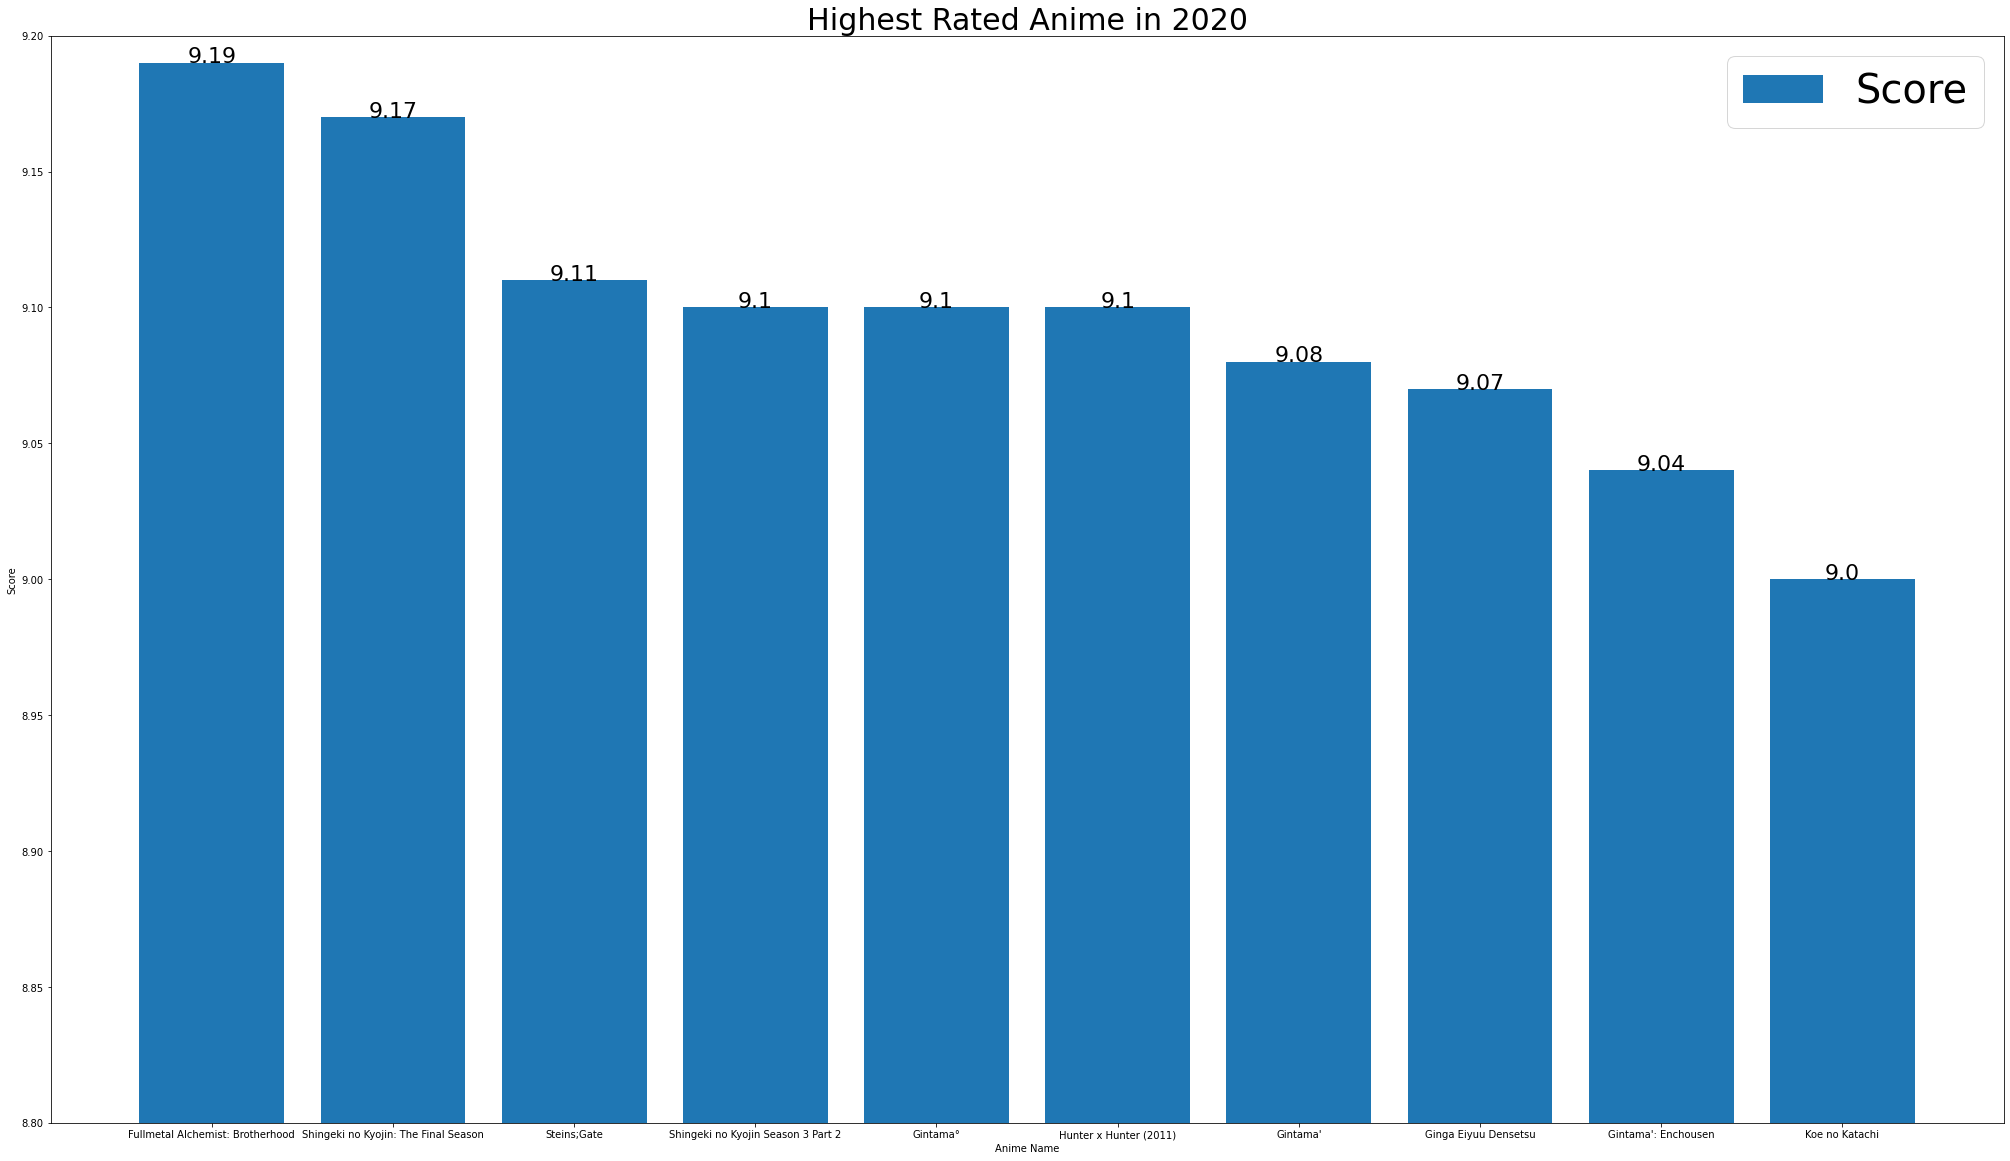

In [8]:
df['Score'] = pd.to_numeric(df['Score'], errors = 'coerce')
sdf = df.sort_values('Score', ascending = False)
sdf = sdf[["Score", "Name"]].head(10)

plt.figure(figsize = (35,20))
plt.bar(sdf["Name"], sdf["Score"], label = "Score")
plt.xticks(rotation=0)
plt.ylim(8.8,9.2)
plt.xlabel('Anime Name')
plt.ylabel("Score")
for i in range(len(sdf["Name"])):
        plt.text(i, sdf["Score"][i], sdf["Score"][i], ha = 'center', size = 22)
plt.legend(fontsize=40)
plt.title('Highest Rated Anime in 2020', size = 30)
plt.show()

<h2>Graphs of the Most Watched & Most Dropped Anime in 2020:</h2>

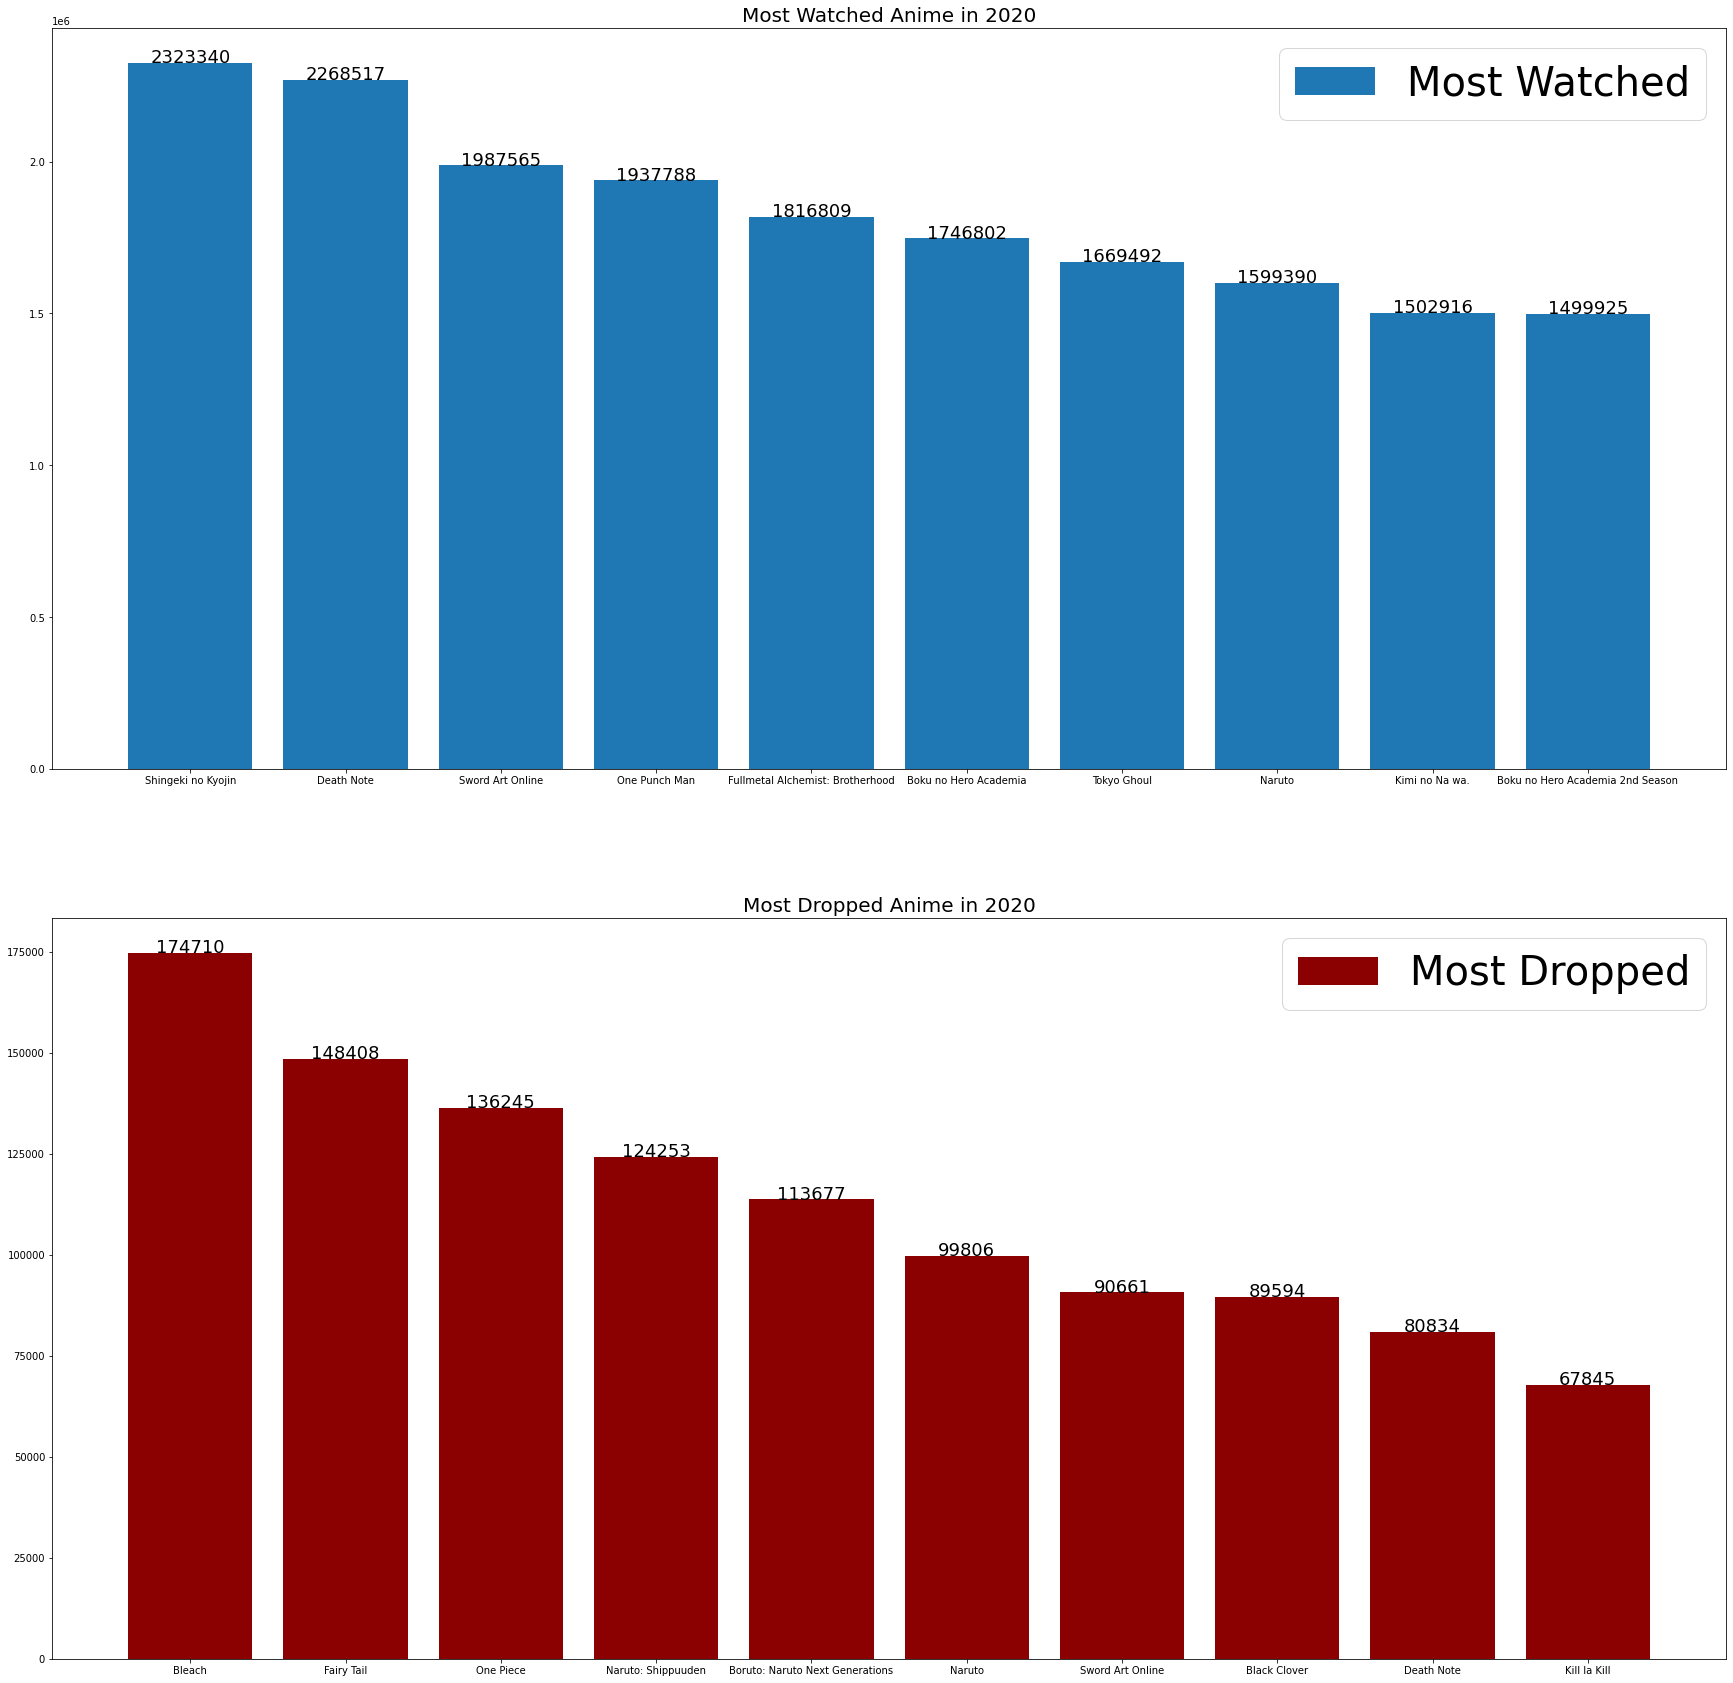

In [9]:
df["Watched"] = df['Completed'] + df['Watching']
wdf = df
# wdf["Watched"] = wdf['Completed'] + wdf['Watching']
wdf = wdf.sort_values('Watched', ascending = False)
wdf = wdf[["Watched", "Name"]].head(10)

ddf = df
ddf = ddf.sort_values('Dropped', ascending = False)
ddf = ddf[["Dropped", "Name"]].head(10)

f, (w, d) = plt.subplots(2, 1, figsize = (30,30))
w.bar(wdf["Name"], wdf["Watched"], label = "Most Watched")
w.set_title('Most Watched Anime in 2020', size = 20)
w.legend(fontsize=40)
d.bar(ddf["Name"], ddf["Dropped"], color = 'darkred', label = "Most Dropped")
d.legend(fontsize=40)
d.set_title('Most Dropped Anime in 2020', size = 20)

for i in range(len(wdf["Name"])):
        w.text(i, wdf["Watched"][i], wdf["Watched"][i], ha = 'center', size = 18)
        d.text(i, ddf["Dropped"][i], ddf["Dropped"][i], ha = 'center', size = 18)

<h2>Pie Chart of the Most Common Genres:</h2>

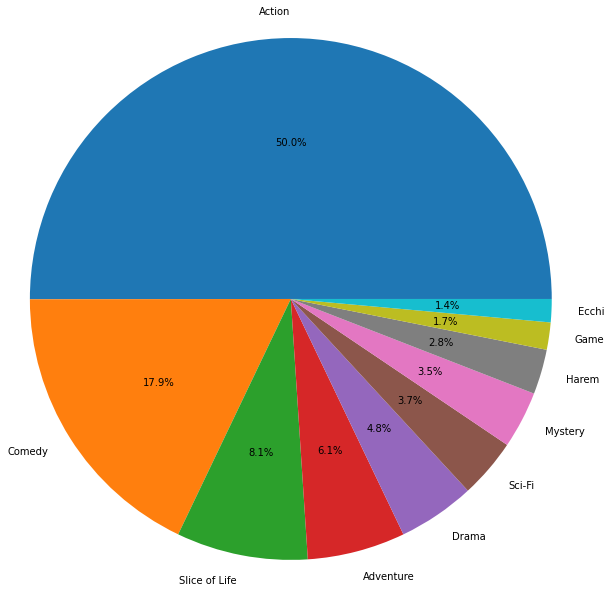

In [10]:
gen = df.groupby("Genres")
gen = gen['Watched'].agg(sum)
gen = gen.sort_values(ascending = False)
gen = gen.head(10)
plt.pie(gen, autopct='%1.1f%%', labels = gen.index, radius = 3, textprops={'fontsize': 10})
plt.show()